<a href="https://colab.research.google.com/github/varad8801/Ml-Projects/blob/main/Credit_Crad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **fraudulent credit card transactions among a dataset of European cardholder**

# Summary

The accuracy chart compares the performance of various models on a dataset, which comprises over 550,000 records of credit card transactions made by European cardholders in 2023. Credit card fraud is a major concern for financial institutions and cardholders, leading to significant financial losses and security issues. With the increasing volume of digital transactions, traditional rule-based systems are becoming less effective, necessitating the need for advanced, scalable, and efficient fraud detection solutions.

The models include Logistic Regression, Decision Trees, Random Forest, SVM, and Gradient Boosting. Two filters are applied for feature selection, addressing multicollinearity and removing less-correlated columns with the target.

1. **Logistic Regression:**
   - Achieved accuracies of 93.8% and 83.59%.

2. **Decision Trees:**
   - Achieved accuracies of 98.9% (using entropy criterion) and 95.26%.

3. **Random Forest:**
   - Achieved an accuracy of 97.24%.

4. **Support Vector Machine (SVM):**
   - Achieved an accuracy of 89.14%.

5. **Gradient Boosting:**
   - Achieved an accuracy of 89.16%.

6. **Artificial Neural Network (ANN):**
   - Achieved an accuracy of 89.22%.

7. **Random Forest Hyperparameter Tuning(Random Search CV):**
   - A Random Forest model was trained on a subsample of the data (5,000 records) for efficient hyperparameter tuning.
   - Hyperparameters were tuned using RandomizedSearchCV, exploring various combinations within defined ranges.
   - The best hyperparameters found:
      - n_estimators: 150
      - max_depth: 20
      - min_samples_split: 5
      - min_samples_leaf: 2
   - The tuned Random Forest model achieved an accuracy of 89.98% on the test set.


8. **Random Forest Hyperparameter Tuning (GridSearchCV):**
   - A Random Forest model was trained on a subsample of the data (5,000 records) for efficient hyperparameter tuning.
   - Hyperparameters were tuned using GridSearchCV, exhaustively searching through predefined combinations within specified ranges.
   - The best hyperparameters found:
      - n_estimators: 150
      - max_depth: 20
      - min_samples_split: 2
      - min_samples_leaf: 4
   - The tuned Random Forest model achieved an accuracy of 90.35% on the test set.




**Feature Selection:**
   - Two filters, `Filter1` and `Filter2`, are applied.
   - `Filter1` removes multicollinearity.
   - `Filter2` removes less-correlated columns with values.
**Data Balancing:**
   - The dataset is balanced, as confirmed by the count plot.
   - Balanced data ensures that the models are not biased towards the majority class, improving overall performance and generalization.



#feature selection

###Finding the correlation

In [ ]:
df.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,-0.578014,0.589321,-0.652940,-0.076331,-0.709346,-0.080004,-0.494255,-0.417226,-0.341056,0.216276,0.145803,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,-0.525797,0.580715,-0.020567,0.494427,0.046002,0.621884,0.605799,0.577296,-0.377803,-0.219164,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,0.558863,-0.574935,0.012801,-0.523294,-0.161325,-0.534392,-0.495836,-0.482162,0.208821,0.263707,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,-0.688436,0.705497,-0.019272,0.673179,0.098516,0.614504,0.578223,0.525509,-0.314396,-0.253805,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,0.708642,-0.722597,0.011519,-0.714847,-0.098627,-0.593948,-0.532786,-0.482267,0.269842,0.257236,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,-0.440100,0.473002,-0.115317,0.387454,0.058686,0.596898,0.669625,0.645095,-0.438118,-0.246694,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,-0.497611,0.498993,-0.117637,0.510123,-0.023851,0.415834,0.378152,0.328019,-0.235623,-0.188360,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,-0.587660,0.603318,-0.030000,0.535612,0.135939,0.667244,0.655755,0.625680,-0.372270,-0.299436,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,0.223052,-0.211999,0.273958,-0.216410,0.101690,-0.230638,-0.277246,-0.249986,0.253272,0.131354,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,-0.633556,0.667266,-0.006167,0.633212,0.114613,0.573957,0.581604,0.522720,-0.294432,-0.328975,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


<Axes: >

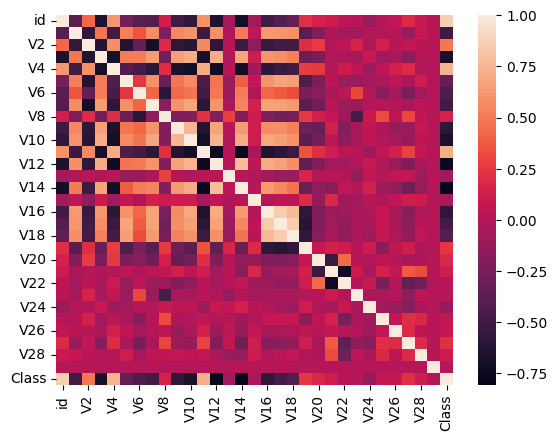

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df_new=df.copy()

**Applying a filter for columns with inter co-relation**

In [ ]:
features = df.drop('Class', axis=1)

correlation_matrix = features.corr()

correlation_threshold = 0.7

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

features_filtered = features.drop(highly_correlated_features, axis=1)
filtered_df = pd.concat([features_filtered, df['Class']], axis=1)

print("Filtered DataFrame:")
print(filtered_df.head())

Highly Correlated Features: {'V18', 'V12', 'V17', 'V10', 'V11', 'V22', 'V14'}
Filtered DataFrame:
   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9       V13       V15       V16       V19       V20  \
0 -0.130006  0.727159 -0.941386  1.804879  0.215598  0.124270  0.091202   
1 -0.133118  0.347452  0.574074  0.706121  0.789188 -0.340687 -0.233984   
2 -0.095576 -0.261297  0.805173  3.069025 -0.577514 -2.366079  0.361652   
3 -0.065130 -0.205698  0.592994 -0.697664 -0.030669 -1.345060 -0.378223   
4 -0.212660  1.049921  1.439310  0.153008  0.224538 

In [ ]:
filtered_df.drop('id',axis=1,inplace=True)

In [ ]:
filtered_df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V13,V15,V16,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,-0.020567,0.046002,0.621884,-0.377803,-0.219164,-0.034669,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,0.012801,-0.161325,-0.534392,0.208821,0.263707,-0.013570,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,-0.019272,0.098516,0.614504,-0.314396,-0.253805,-0.021710,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,0.011519,-0.098627,-0.593948,0.269842,0.257236,-0.013093,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,-0.115317,0.058686,0.596898,-0.438118,-0.246694,0.034147,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,-0.117637,-0.023851,0.415834,-0.235623,-0.188360,-0.040153,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,-0.030000,0.135939,0.667244,-0.372270,-0.299436,0.019627,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,0.273958,0.101690,-0.230638,0.253272,0.131354,0.056416,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,-0.006167,0.114613,0.573957,-0.294432,-0.328975,0.131001,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V13,-0.020567,0.012801,-0.019272,0.011519,-0.115317,-0.117637,-0.030000,0.273958,-0.006167,1.000000,-0.016044,-0.082089,0.167676,-0.007267,0.025529,-0.123520,0.060097,0.003580,0.043750,0.058483,-0.101488,-0.002718,-0.071105


First Model on 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15',
       'V16', 'V19', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'

**Applying a filter for columns with less co-relation**

In [ ]:
df_f=filtered_df.drop(filtered_df.columns[abs(filtered_df.corrwith(filtered_df['Class'])) < 0.2], axis=1)

#Model Selection

##Logistic Regression

###First Logistic Regression Model





In [ ]:
df_f.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V16', 'V19', 'V27',
       'Class'],
      dtype='object')

In [ ]:
X=df_f.drop('Class',axis=1).values

In [ ]:
Y=df_f.Class.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLogi=LogisticRegression()
modelLogi.fit(x_train,y_train)

LogisticRegression()

In [ ]:
predLogi=modelLogi.predict(x_test)
predLogi

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
cm_logi=confusion_matrix(y_test,predLogi)
acc_logi=accuracy_score(y_test,predLogi)

In [ ]:
acc_logi

0.938758283037184

In [ ]:
cm_logi

array([[67528,  3328],
       [ 5378, 65924]])



---

Data Seems to be over fitted for the above model

Applying some changes to features



---

Changing the threshold for feature selection

###second Logistic Regression Model





In [ ]:
features = df.drop('Class', axis=1)

correlation_matrix = features.corr()

correlation_threshold = 0.6

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

features_filtered = features.drop(highly_correlated_features, axis=1)
filtered_df = pd.concat([features_filtered, df['Class']], axis=1)

print("Filtered DataFrame:")
print(filtered_df.head())

Highly Correlated Features: {'V3', 'V18', 'V12', 'V10', 'V11', 'V17', 'V7', 'V19', 'V9', 'V4', 'V22', 'V5', 'V14', 'V16', 'V8'}
Filtered DataFrame:
   id        V1        V2        V6       V13       V15       V20       V21  \
0   0 -0.260648 -0.469648  0.732898 -0.941386  1.804879  0.091202 -0.110552   
1   1  0.985100 -0.356045  0.428605  0.574074  0.706121 -0.233984 -0.194936   
2   2 -0.260272 -0.949385  1.419481  0.805173  3.069025  0.361652 -0.005020   
3   3 -0.152152 -0.508959  1.143312  0.592994 -0.697664 -0.378223 -0.146927   
4   4 -0.206820 -0.165280  0.530549  1.439310  0.153008  0.247237 -0.106984   

        V23       V24       V25       V26       V27       V28    Amount  Class  
0 -0.134794  0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.079469 -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37      0  
2  0.945045 -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.214048 -1.893131  1.003963 -0.515950 -0.165316  

In [ ]:
filtered_df.columns

Index(['id', 'V1', 'V2', 'V6', 'V13', 'V15', 'V20', 'V21', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
X=filtered_df.drop(['Class','id'],axis=1).values
Y=filtered_df.Class.values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8359741835640047


##Decision Tree

###First Decision Tree Model





In [ ]:
features = df.drop('Class', axis=1)

correlation_matrix = features.corr()

correlation_threshold = 0.5

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

features_filtered = features.drop(highly_correlated_features, axis=1)
filtered_df = pd.concat([features_filtered, df['Class']], axis=1)

print("Filtered DataFrame:")
print(filtered_df.head())

Highly Correlated Features: {'V3', 'V18', 'V12', 'V10', 'V11', 'V17', 'V7', 'V19', 'V6', 'V9', 'V4', 'V22', 'V2', 'V5', 'V14', 'V16', 'V21', 'V8'}
Filtered DataFrame:
   id        V1       V13       V15       V20       V23       V24       V25  \
0   0 -0.260648 -0.941386  1.804879  0.091202 -0.134794  0.165959  0.126280   
1   1  0.985100  0.574074  0.706121 -0.233984  0.079469 -0.577395  0.190090   
2   2 -0.260272  0.805173  3.069025  0.361652  0.945045 -1.154666 -0.605564   
3   3 -0.152152  0.592994 -0.697664 -0.378223 -0.214048 -1.893131  1.003963   
4   4 -0.206820  1.439310  0.153008  0.247237 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  


In [ ]:
filtered_df.drop('id',axis=1,inplace=True)

In [ ]:
filtered_df.columns

Index(['V1', 'V13', 'V15', 'V20', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [ ]:
X=filtered_df.drop('Class',axis=1).values
Y=filtered_df.Class.values
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=0)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy',random_state=0)

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print it
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 0.9890


Data Seems to be over fitted for the above model

Applying some changes to features

---



###Second Decision Tree Model





In [ ]:
features = df.drop('Class', axis=1)

correlation_matrix = features.corr()
#changing threshold to 0.6
correlation_threshold = 0.6

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly Correlated Features:", highly_correlated_features)

features_filtered = features.drop(highly_correlated_features, axis=1)
filtered_df = pd.concat([features_filtered, df['Class']], axis=1)

print("Filtered DataFrame:")

filtered_df.drop('id',axis=1,inplace=True)
print(filtered_df.head())

Highly Correlated Features: {'V3', 'V18', 'V12', 'V10', 'V11', 'V17', 'V7', 'V19', 'V9', 'V4', 'V22', 'V5', 'V14', 'V16', 'V8'}
Filtered DataFrame:
         V1        V2        V6       V13       V15       V20       V21  \
0 -0.260648 -0.469648  0.732898 -0.941386  1.804879  0.091202 -0.110552   
1  0.985100 -0.356045  0.428605  0.574074  0.706121 -0.233984 -0.194936   
2 -0.260272 -0.949385  1.419481  0.805173  3.069025  0.361652 -0.005020   
3 -0.152152 -0.508959  1.143312  0.592994 -0.697664 -0.378223 -0.146927   
4 -0.206820 -0.165280  0.530549  1.439310  0.153008  0.247237 -0.106984   

        V23       V24       V25       V26       V27       V28    Amount  Class  
0 -0.134794  0.165959  0.126280 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.079469 -0.577395  0.190090  0.296503 -0.248052 -0.064512   6531.37      0  
2  0.945045 -1.154666 -0.605564 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.214048 -1.893131  1.003963 -0.515950 -0.165316  0.048424   5384.44      

In [ ]:
filtered_df.columns

Index(['V1', 'V2', 'V6', 'V13', 'V15', 'V20', 'V21', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
df_f=filtered_df.drop(filtered_df.columns[abs(filtered_df.corrwith(filtered_df['Class'])) < 0.2], axis=1)

removing features that are having less corelation to the target than 0.2 %

In [ ]:
df_f.columns

Index(['V1', 'V2', 'V6', 'V27', 'Class'], dtype='object')

In [ ]:
X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
# Initialize the Decision Tree model
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print it
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9526




---

##Random Forest

###Random forest model Model





In [ ]:
X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
# Initialize the Decision Tree model
model = RandomForestClassifier(n_estimators=100,random_state=1)

# Train the model on the training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print it
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9724


##Hyperparameter Tuning

###Random Forest Model with Random search





In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


subsample_size = 5000
X_train_subsample, _, y_train_subsample, _ = train_test_split(X_train, y_train, train_size=subsample_size, random_state=42)


scaler = StandardScaler()
X_train_subsample_scaled = scaler.fit_transform(X_train_subsample)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters and their possible values
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=3, random_state=42
)


random_search.fit(X_train_subsample_scaled, y_train_subsample)


print("Best Hyperparameters:", random_search.best_params_)


y_pred = random_search.best_estimator_.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 0.8998


###Random Forest Model with Grid Search





In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV

X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


subsample_size = 5000
X_train_subsample, _, y_train_subsample, _ = train_test_split(X_train, y_train, train_size=subsample_size, random_state=42)


scaler = StandardScaler()
X_train_subsample_scaled = scaler.fit_transform(X_train_subsample)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(
    rf_model, param_grid=param_grid, scoring='accuracy', cv=3
)


grid_search.fit(X_train_subsample_scaled, y_train_subsample)


print("Best Hyperparameters:", grid_search.best_params_)


y_pred = grid_search.best_estimator_.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9035




---
##SVM


In [ ]:
X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

model = SVC(kernel='rbf', random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8914


##GradientBoosting

In [ ]:
X=df_f.drop('Class',axis=1).values
Y=df_f.Class.values

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=1)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8916


##ANN

In [ ]:
X=df.drop(['Class','id'],axis=1).values
Y=df_f.Class.values
import tensorflow as tf
import keras as ks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and labels
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Standardize the data using StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ann = tf.keras.models.Sequential()

#Adding input layer
ann.add(tf.keras.layers.Dense(units = 9 , activation='relu'))
#Adding second hidden line
ann.add(tf.keras.layers.Dense(units=3,activation='relu'))
#compile the ann

ann.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

ann.fit(x_train, y_train,batch_size=32,epochs=50)


y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy and print it
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")


Epoch 1/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.3946 - accuracy: 0.4864
Epoch 2/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.1082 - accuracy: 0.4335
Epoch 3/50
12439/12439 [==============================] - 28s 2ms/step - loss: 0.0723 - accuracy: 0.4603
Epoch 4/50
12439/12439 [==============================] - 39s 3ms/step - loss: 0.0702 - accuracy: 0.5155
Epoch 5/50
12439/12439 [==============================] - 26s 2ms/step - loss: 0.0570 - accuracy: 0.5213
Epoch 6/50
12439/12439 [==============================] - 24s 2ms/step - loss: 0.0585 - accuracy: 0.5293
Epoch 7/50
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0631 - accuracy: 0.4954
Epoch 8/50
12439/12439 [==============================] - 27s 2ms/step - loss: 0.0550 - accuracy: 0.4962
Epoch 9/50
12439/12439 [==============================] - 36s 3ms/step - loss: 0.0624 - accuracy: 0.5440
Epoch 10/50
12439/12439 [==============================

#Accuracy Table

`*Here first filter is applied to remove the multiple co-linearity btn the columns`

`*2nd one is to remove less co-related columns to the target column`

In [ ]:
accuracy_data = {
    'Model': ['Logistic Regression 1','Logistic Regression 2','Decision Tree 1','Decision Tree 2','Random Forest','*Random Forest Hypertuned(Random Search)','*Random Forest Hypertuned(Grid Search)','SVM','GradientBoosting','ANN'],
    'Accuracy%': [0.938, 0.8359,  0.9890, 0.9526, 0.9724,0.8998,0.9010,0.8914,0.8916,0.8922],
    'Filter1':[0.7,0.6,0.5,0.6,0.6,0.6,0.6,0.6,0.6,0.6],
    'Filter2':[0.2,0,0,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
}

accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df['Accuracy%'] = accuracy_df['Accuracy%'] * 100
accuracy_df

,Model,Accuracy%,Filter1,Filter2
0,Logistic Regression 1,93.80,0.7,0.2
1,Logistic Regression 2,83.59,0.6,0.0
2,Decision Tree 1,98.90,0.5,0.0
3,Decision Tree 2,95.26,0.6,0.2
4,Random Forest,97.24,0.6,0.2
5,*Random Forest Hypertuned(Random Search),89.98,0.6,0.2
6,*Random Forest Hypertuned(Grid Search),90.10,0.6,0.2
7,SVM,89.14,0.6,0.2
8,GradientBoosting,89.16,0.6,0.2
9,ANN,89.22,0.6,0.2


In [ ]:

import pandas as pd

data = {
    'Model': ['Logistic Regression 1', 'Logistic Regression 2', 'Decision Tree 1', 'Decision Tree 2', 'Random Forest', 'Random Forest Hypertuned(Random Search)', 'Random Forest Hypertuned(Grid Search)', 'SVM', 'GradientBoosting', 'ANN'],
    'Accuracy': [93.8, 83.59, 0.989, 0.9526, 0.9724, 0.8998, 0.901, 0.8914, 0.8916, 0.8922],
    'Filter1': [0.7, 0.6, 0.5, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
    'Filter2': [0.2, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
    'Features_used': [['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V16', 'V19', 'V27'],
                      ['V1', 'V2', 'V6', 'V13', 'V15', 'V20', 'V21', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
                      ['V1', 'V13', 'V15', 'V20', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27'],
                      ['V1', 'V2', 'V6', 'V27']]
}

df = pd.DataFrame(data)

df


,Model,Accuracy,Filter1,Filter2,Features_used
0,Logistic Regression 1,93.8000,0.7,0.2,"[V1, V2, V3, V4, V5, V6, V7, V9, V16, V19, V27]"
1,Logistic Regression 2,83.5900,0.6,0.0,"[V1, V2, V6, V13, V15, V20, V21, V23, V24, V25..."
2,Decision Tree 1,0.9890,0.5,0.0,"[V1, V13, V15, V20, V23, V24, V25, V26, V27, V..."
3,Decision Tree 2,0.9526,0.6,0.2,"[V1, V2, V6, V27]"
4,Random Forest,0.9724,0.6,0.2,"[V1, V2, V6, V27]"
5,Random Forest Hypertuned(Random Search),0.8998,0.6,0.2,"[V1, V2, V6, V27]"
6,Random Forest Hypertuned(Grid Search),0.9010,0.6,0.2,"[V1, V2, V6, V27]"
7,SVM,0.8914,0.6,0.2,"[V1, V2, V6, V27]"
8,GradientBoosting,0.8916,0.6,0.2,"[V1, V2, V6, V27]"
9,ANN,0.8922,0.6,0.2,"[V1, V2, V6, V27]"


#Conclusion

The dataset is balanced, as confirmed by the count plot.

and number of fraudulent and  non-fraudulent is same 50-50%

**Feature selection**

Filter 1 - Addressing Multicollinearity:

The first filter aims to eliminate multicollinearity among the columns.
Multicollinearity occurs when two or more features in the dataset are highly correlated, leading to redundancy in the information they provide.

Filter 2 - Removing Less Correlated Columns to the Target:

The second filter targets columns that are less correlated with the target variable (output or label).
Features with low correlation to the target may contribute less valuable information to the model.

